### Project Goal
The goal of this project is to create a Machine Learning model that is capable of determining if the S&P 500 will increase in price tomorrow

#### Imports

In [35]:
import yfinance as yf
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
import pandas as pd

#### Data Collection

Below, we are collecting trading data for the S&P 500 using Yahoo Finance's free API

In [36]:
sp500 = yf.Ticker("^GSPC")

In [37]:
sp500 = sp500.history(period="max")

/Users/riteshpersaud/Desktop/ML/venv/lib/python3.14/site-packages/yfinance/scrapers/history.py:201: Pandas4Warning: Timestamp.utcnow is deprecated and will be removed in a future version. Use Timestamp.now('UTC') instead.
  dt_now = pd.Timestamp.utcnow()


In [38]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2026-01-14 00:00:00-05:00,6937.410156,6941.299805,6885.740234,6926.600098,5530830000,0.0,0.0
2026-01-15 00:00:00-05:00,6969.459961,6979.339844,6937.930176,6944.470215,5114050000,0.0,0.0
2026-01-16 00:00:00-05:00,6960.540039,6967.299805,6925.089844,6940.009766,5356550000,0.0,0.0


In [39]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2026-01-07 00:00:00-05:00', '2026-01-08 00:00:00-05:00',
               '2026-01-09 00:00:00-05:00', '2026-01-12 00:00:00-05:00',
               '2026-01-13 00:00:00-05:00', '2026-01-14 00:00:00-05:00',
               '2026-01-15 00:00:00-05:00', '2026-01-16 00:00:00-05:00',
               '2026-01-20 00:00:00-05:00', '2026-01-21 00:00:00-05:00'],
              dtype='datetime64[s, America/New_York]', name='Date', length=24630, freq=None)

Because the `yf.Ticker.history` method returns a DataFrame with a DateTimeIndex, we can use this index directly for plotting -- DataFrames can use Panda's basic plotting functionality for quick visualization

<Axes: xlabel='Date'>

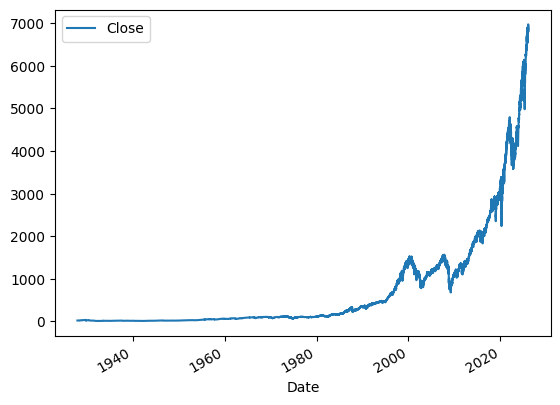

In [40]:
sp500.plot.line(y="Close", use_index=True)

We can delete the **Dividends** and **Stock Splits** columns because we do not need them for our data set

In [41]:
del sp500['Dividends']
del sp500['Stock Splits']

Create a new column in the DataFrame called **Tomorrow**. This column will contain the **Closing Price** of the following day. We do this do have the real data that we can use for training

In [42]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [43]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2026-01-14 00:00:00-05:00,6937.410156,6941.299805,6885.740234,6926.600098,5530830000,6944.470215
2026-01-15 00:00:00-05:00,6969.459961,6979.339844,6937.930176,6944.470215,5114050000,6940.009766
2026-01-16 00:00:00-05:00,6960.540039,6967.299805,6925.089844,6940.009766,5356550000,6796.859863


Now that we have the real data, we can create a new column called **Target** that will display if the following day had a positive gain or not (1 for positive, 0 for negative). This will be used by the model to help train it to know if we should buy for tomorrow.

In [44]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [45]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2026-01-14 00:00:00-05:00,6937.410156,6941.299805,6885.740234,6926.600098,5530830000,6944.470215,1
2026-01-15 00:00:00-05:00,6969.459961,6979.339844,6937.930176,6944.470215,5114050000,6940.009766,0
2026-01-16 00:00:00-05:00,6960.540039,6967.299805,6925.089844,6940.009766,5356550000,6796.859863,0


We have a lot of data in this data set -- this is usually great, however, because the stock market goes the era changes, sometimes the fundamentals change over time. This means that data from the mid-1900s might actually confuse our model and decrease its accuracy. To avoid this, we can remove the training data from before 1990

In [46]:
sp500 = sp500.loc["1990-01-01":].copy()
# Gets data with an index of 1990-01-01 and later (:)

In [47]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2026-01-14 00:00:00-05:00,6937.410156,6941.299805,6885.740234,6926.600098,5530830000,6944.470215,1
2026-01-15 00:00:00-05:00,6969.459961,6979.339844,6937.930176,6944.470215,5114050000,6940.009766,0
2026-01-16 00:00:00-05:00,6960.540039,6967.299805,6925.089844,6940.009766,5356550000,6796.859863,0


### Model Training
For this project, we are going to use `sklearn` and a **Random Forest Classifier**.

Random Forests train a bunch of individual decision trees with randomized parameters and then average the results. This makes it less susceptible to over fitting. Also, Random Forests are good for picking up non-linear relationships between features (predictive variables)

In [48]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

`n_estimators` is the number of trees in the forest. Generally speaking, the higher the number the better, but also the slower (it plateaus as you get higher)

`min_samples_split` prevents over fitting but the higher the number the less accurate the model becomes

`random_state` decides how much randomness will be in the forest (1 reduces the randomness between runs)

Now that we have a model, we need to train it. Because we are using **Time Series Data** we cannot use cross-validation (splitting the data set into small groups, training on random groups and testing on the remaining). This would make the training results look really good, but when you go to test in real life, the model would not perform well. 

This is because with cross-validation we don't know the order of the groups being trained. This can cause the model to use future information to predict the past -- makes it really good at predicting the data but when it gets new unfamiliar data it will flop. This is called **Leakage** where information that is not known at prediction time (when the model would have to make a decision) is accidentally given during prediction time.

For example, if the stock market has been up and down recently and you were asked to predict the stock market price tomorrow, and you knew that in a week the price is up, you might take a guess that the price is going to go up. On the other hand, if you did not know the future price, you might make a different decision.

In [49]:
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

Instead, because of the **Time Series** nature of the data, we are going to test on the most recent 100 data points -- this way, we know real values but we are also training in a time aware manner

Now, we need to decide which features/predictors we want to use. This is important -- because some values are more important in predicting than others. Another reason why it is important to manually define the features is to prevent any potential leakage that might occur.

In [50]:
predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])
# Training the model --> The first argument is the data we are using to predict, the second argument is what we are trying to predict

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",100
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metr

### Measuring Performance

Now that we have trained the model, we can test it on our test data. The `predict` method just returns an array of all of the predicted values. To make it easier to interpret, we can use `pandas` **Series** to add in the index value that each prediction is associated to

In [51]:
preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index, name="Predictions")
preds

Date
2025-08-28 00:00:00-04:00    0
2025-08-29 00:00:00-04:00    0
2025-09-02 00:00:00-04:00    0
2025-09-03 00:00:00-04:00    0
2025-09-04 00:00:00-04:00    0
                            ..
2026-01-14 00:00:00-05:00    0
2026-01-15 00:00:00-05:00    0
2026-01-16 00:00:00-05:00    0
2026-01-20 00:00:00-05:00    0
2026-01-21 00:00:00-05:00    0
Name: Predictions, Length: 100, dtype: int64

To measure the performance of the model, we are going to use the `precision_score` from `sklearn`. The **Precision Score** is the percentage of true positives. 

It is determined as $$ \text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}} $$
Where:
- $ TP $ is the True Positives (correctly identified)
- $ FP $ is the False Positives
 

In [52]:
precision_score(test["Target"], preds)

/Users/riteshpersaud/Desktop/ML/venv/lib/python3.14/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


0.0

In [53]:
combined = pd.concat([test["Target"], preds], axis=1)

<Axes: xlabel='Date'>

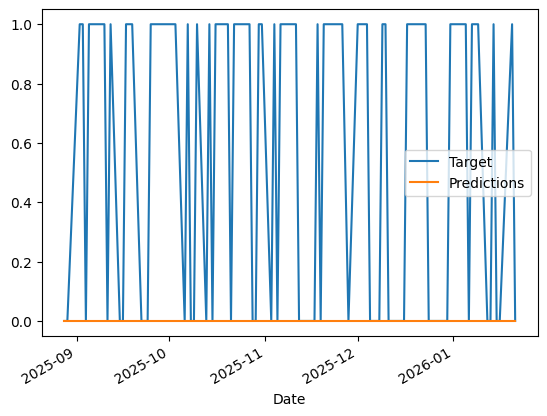

In [54]:
combined.plot()

### Back Testing

Backing Testing is a way to 

In [55]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [56]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:i+step].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)

    return pd.concat(all_predictions)

In [57]:
predictions = backtest(sp500, model, predictors)

In [58]:
predictions["Predictions"].value_counts()

Predictions
0    3904
1    2676
Name: count, dtype: int64

In [59]:
precision_score(predictions["Target"], predictions["Predictions"])

0.53101644245142

In [60]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.537538
0    0.462462
Name: count, dtype: float64

In [61]:
horizons = [2, 5, 60, 250, 1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()

    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]

    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

    new_predictors += [ratio_column, trend_column]
    

In [62]:
sp500 = sp500.dropna()

In [63]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026-01-13 00:00:00-05:00,6977.410156,6985.830078,6938.770020,6963.740234,5091730000,6926.600098,0,0.999029,1.0,1.001986,3.0,1.021622,37.0,1.114162,145.0,1.385661,534.0
2026-01-14 00:00:00-05:00,6937.410156,6941.299805,6885.740234,6926.600098,5530830000,6944.470215,1,0.997326,0.0,0.996480,3.0,1.015521,36.0,1.107527,144.0,1.377614,534.0
2026-01-15 00:00:00-05:00,6969.459961,6979.339844,6937.930176,6944.470215,5114050000,6940.009766,0,1.001288,1.0,0.998390,3.0,1.017620,36.0,1.109670,145.0,1.380493,535.0


In [64]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [65]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]

    preds[preds >= 0.6] = 1
    preds[preds < 0.6] = 0

    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [66]:
predictions = backtest(sp500, model, new_predictors)

In [67]:
predictions["Predictions"].value_counts()

Predictions
0.0    4709
1.0     870
Name: count, dtype: int64

In [68]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5758620689655173